<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   House_ID                   10 non-null     int64  
 1   Location                   10 non-null     object 
 2   Size_sqft                  10 non-null     int64  
 3   Bedrooms                   10 non-null     int64  
 4   Bathrooms                  10 non-null     int64  
 5   Year_Built                 10 non-null     int64  
 6   Has_Garage                 10 non-null     int64  
 7   Has_Garden                 10 non-null     int64  
 8   Distance_to_CityCenter_km  10 non-null     float64
 9   Price                      10 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 932.0+ bytes


Text(0.5, 1.0, 'Feature Correlation')

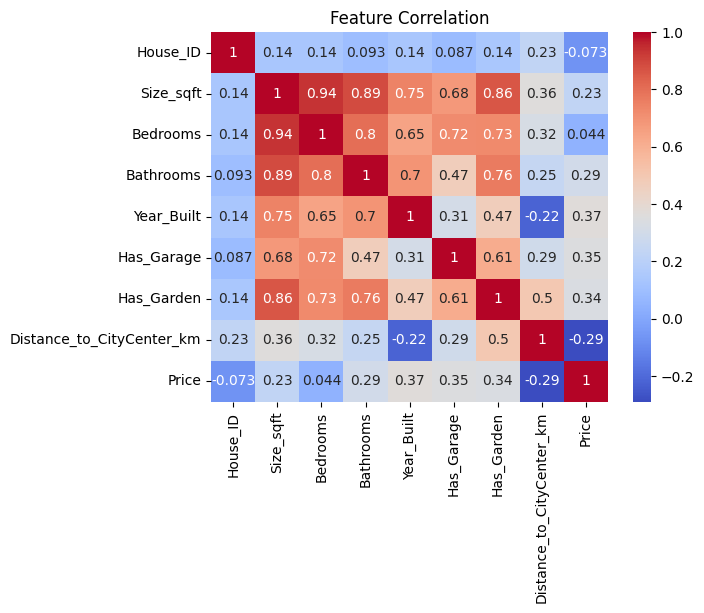

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_excel("/content/dataset house prediction.xlsx")
df.head()
df.info()  # Check types and nulls
df = df.dropna()  # Basic missing value handling
df = df.drop_duplicates()
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Sale Price")
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")


In [12]:
# Example: Select numeric features only for simplicity
df_num = df.select_dtypes(include=[np.number])
X = df_num.drop("Price", axis=1)
y = df_num["Price"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, lr_preds))


Linear Regression R²: -106.46214040532962


In [15]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_preds))


Random Forest R²: -0.2823027777777778


In [16]:
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))

print_metrics(y_test, lr_preds, "Linear Regression")
print_metrics(y_test, rf_preds, "Random Forest")


--- Linear Regression ---
MAE: 606299.6320668794
RMSE: 621983.6858464911
R²: -106.46214040532962
--- Random Forest ---
MAE: 60200.0
RMSE: 67943.28517226702
R²: -0.2823027777777778


Text(0.5, 1.0, 'Top 10 Important Features')

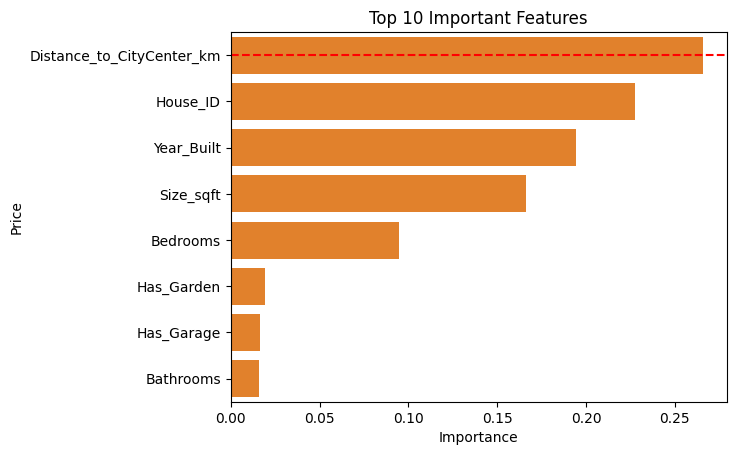

In [17]:
# Residual Plot
residuals = y_test - rf_preds
sns.scatterplot(x=rf_preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals - Random Forest")

# Feature Importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
